In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

#                                         🔎EDA🔍

###                                   🧽EXPLORACIÓN Y LIMPIEZA🧼
###                                       🧹🧹🧹🧹🧹🧹🧹🧹🧹🧹

#### ANÁLISIS CUSTOMER FLIGHT ACTIVITY🛫

In [118]:
df_flight = pd.read_csv("archivos/Customer Flight Activity.csv")

df_flight.sample(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
367175,750130,2018,10,0,0,0,0,0.0,0,0
211090,541564,2018,1,6,2,8,3208,320.0,0,0
324569,284621,2018,8,12,0,12,780,78.0,0,0
291711,335554,2018,6,20,5,25,3625,362.0,0,0
4307,330515,2017,1,9,0,9,2709,270.0,0,0
66149,922484,2017,4,0,0,0,0,0.0,0,0
397696,577405,2018,12,6,6,12,3384,338.0,0,0
267783,204935,2018,3,15,2,17,3451,517.5,0,0
86666,214878,2017,6,4,0,4,1196,119.0,0,0
384844,790940,2018,11,0,0,0,0,0.0,0,0


In [119]:
df_flight.info()# no tiene nulos , lo que tiene son muchas  filas sin datos(datos 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [120]:
df_flight.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


## Duplicados

In [122]:
df_flight.duplicated().sum()

1864

In [123]:
df_revisar = df_flight[df_flight.duplicated(subset="Loyalty Number", keep=False)].sort_values("Loyalty Number")

df_revisar.to_csv("Archivos/revisar.csv")



<small>- **`index:`** El índice de la fila (es decir, la posición en el DataFrame).
- **`row:`** El contenido de la fila como un objeto pandas Series, donde cada valor de la fila es accesible por su nombre de columna.
- **`df_flight[df_flight.duplicated(keep=False)]:`** Muestra todas las filas duplicadas en el DataFrame.

- **`iterrows():`** Te permite recorrer cada fila duplicada para compararlas visualmente y detectar cualquier pequeña diferencia que cause que pandas las marque como duplicadas.<small>


In [124]:
# Verificar qué diferencias hay entre las filas duplicadas
duplicados = df_flight[df_flight.duplicated(keep=False)]# con este False te enseña también  la original,no solo los duplicados

# Comparar fila por fila
for index, row in duplicados.iterrows():      

                                              
    print(f"Fila {index}: {row}")


Fila 41: Loyalty Number                 101902.0
Year                             2017.0
Month                               1.0
Flights Booked                      0.0
Flights with Companions             0.0
Total Flights                       0.0
Distance                            0.0
Points Accumulated                  0.0
Points Redeemed                     0.0
Dollar Cost Points Redeemed         0.0
Name: 41, dtype: float64
Fila 42: Loyalty Number                 101902.0
Year                             2017.0
Month                               1.0
Flights Booked                      0.0
Flights with Companions             0.0
Total Flights                       0.0
Distance                            0.0
Points Accumulated                  0.0
Points Redeemed                     0.0
Dollar Cost Points Redeemed         0.0
Name: 42, dtype: float64
Fila 226: Loyalty Number                 112142.0
Year                             2017.0
Month                               1.0
Fl

In [91]:
df_flight= df_flight.drop_duplicates(subset="Loyalty Number", keep="last")
df_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
246,100504,2018,12,0,0,0,0,0.0,0,0
684,101709,2018,12,0,0,0,0,0.0,0,0
998,101876,2018,12,0,0,0,0,0.0,0,0
1332,105251,2018,12,0,0,0,0,0.0,0,0
1969,106509,2018,12,0,0,0,0,0.0,0,0


In [125]:
df_flight = df_flight.drop_duplicates()

In [126]:
df_flight.duplicated().sum()

0

In [128]:
df_flight.sample(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
242698,715255,2018,2,8,0,8,1664,207.50,0,0
310106,415446,2018,7,0,0,0,0,0.00,0,0
10591,118511,2018,11,0,0,0,0,0.00,0,0
227723,297327,2018,4,1,1,2,1094,117.72,324,26
70506,256323,2017,5,0,0,0,0,0.00,0,0
333840,774168,2018,8,10,7,17,1122,112.00,0,0
167475,918478,2017,10,0,0,0,0,0.00,0,0
394525,411523,2018,12,11,9,20,1720,172.00,0,0
222229,628533,2018,4,5,2,7,574,71.25,0,0
127541,591731,2017,8,11,1,12,4560,456.00,0,0


## Nulos

In [94]:
df_flight.isnull().sum()# no tiene nulos, tiene muchas filas con valor 0 en todas sus columnas menos Loyalty Number; Year y Month

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

### ANÁLISIS CUSTOMER LOYALTY HISTORY🛬

In [134]:
df_loyalty = pd.read_csv("archivos/Customer Loyalty History.csv")
df_loyalty.sample(10)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
220,660554,Canada,Alberta,Edmonton,T3G 6Y6,Female,Bachelor,61809.0,Married,Star,4282.95,Standard,2017,10,NaN,NaN
9977,181423,Canada,British Columbia,Vancouver,V5R 1W3,Male,Master,127574.0,Married,Star,2227.07,Standard,2013,8,NaN,NaN
796,784113,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,College,NaN,Single,Aurora,5016.64,Standard,2012,6,NaN,NaN
16262,271463,Canada,British Columbia,Whistler,V6T 1Y8,Female,Bachelor,83832.0,Married,Star,17114.33,Standard,2017,6,NaN,NaN
6517,412480,Canada,Ontario,Toronto,P1J 8T7,Male,Bachelor,89067.0,Married,Nova,5270.01,Standard,2018,9,NaN,NaN
15426,421252,Canada,Ontario,Toronto,P1W 1K4,Female,Bachelor,72765.0,Single,Star,9264.57,Standard,2018,10,NaN,NaN
11321,144261,Canada,Newfoundland,St. John's,A1C 6H9,Female,Bachelor,84814.0,Divorced,Star,2616.61,Standard,2012,11,NaN,NaN
9509,467894,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,Doctor,116909.0,Married,Nova,20725.38,Standard,2015,2,NaN,NaN
12292,108367,Canada,Ontario,Toronto,M8Y 4K8,Female,Bachelor,54794.0,Married,Star,3528.04,Standard,2017,5,2018.0,1.0
2172,296915,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67309.0,Married,Aurora,7564.61,Standard,2013,12,NaN,NaN


In [135]:
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [136]:
df_loyalty.describe(include="O").T #columnas object

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [137]:
df_loyalty.describe().T  #columnas numéricas
#posibles valores negativos en la columna Salary. Errores?

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [138]:
df_loyalty["Salary"].value_counts() #con value.counts corroboramos que hay mas valores negativos de los  que vimos en el describe anterior valor de Salary en negativo, posible error. Cambiar a positivo?

Salary
 101933.0    23
 62283.0     14
 61809.0     14
 51573.0     14
 64001.0     13
             ..
 95907.0      1
 72440.0      1
 88633.0      1
 100572.0     1
-57297.0      1
Name: count, Length: 5890, dtype: int64

#### Limpieza

In [139]:
df_loyalty["Salary"]=df_loyalty["Salary"].abs()#cambiar numeros negativos de columna "Salary" a positivos


In [140]:
df_loyalty["Salary"].value_counts()# vemos que el que era negativo arriba, ya no aparece como negativo

Salary
101933.0    23
62283.0     14
61809.0     14
51573.0     14
64001.0     13
            ..
95907.0      1
72440.0      1
88633.0      1
100572.0     1
57297.0      1
Name: count, Length: 5890, dtype: int64

####                              Nulos

In [141]:
df_loyalty.isnull().sum() / df_loyalty.shape[0]* 100 # comprobamos el porcentaje de nulos por columna

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

<small>Hay 3 columnas con nulos.Vamos al DataFrame a mirar que se puede ver a simple vista. Hacemos varios sample para ver las 3 columnas. Vemos que en principio lo nulos de la columna "Salary" coinciden con con el valor "College" de la columna "Education". Vamos a ver como se comportan estos nulos .<small>

In [143]:
df_loyalty.groupby("Education")["Salary"].count().round(2)# en "collegue" no hay valores para "Salary"

Education
Bachelor                10475
College                     0
Doctor                    734
High School or Below      782
Master                    508
Name: Salary, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_12360\606077412.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Education', y='Salary', data=df_loyalty, palette='viridis')


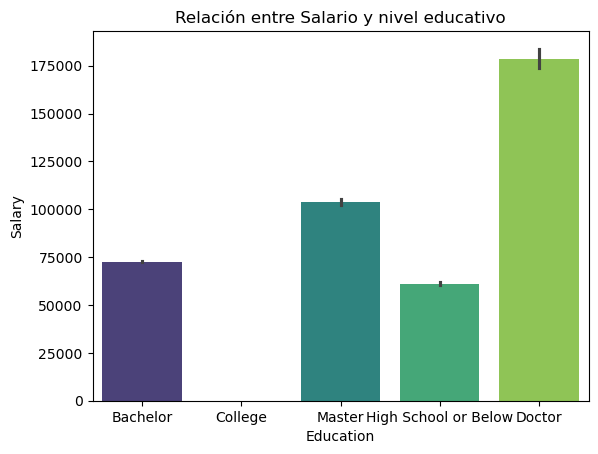

In [144]:

sns.barplot(x='Education', y='Salary', data=df_loyalty, palette='viridis')
plt.title("Relación entre Salario y nivel educativo")
plt.show();

In [145]:
media_high_bachelor = df_loyalty[df_loyalty['Education'].isin(['High Schooll or Below', 'Bachelor'])]['Salary'].mean().round(2)
df_loyalty[["Salary"]] = df_loyalty[["Salary"]].fillna(media_high_bachelor)

<small>Los nulos de "Salary" parecen acumularse en el nivel educativo de "College" .El nivel "college" se encuentra entre "High" y "Bachelor" , con lo que deducimos que su nivel salarial estará situado en la misma posición. Calculamos la media del salario de "High" y "Bachelor"  y se la imputamos a los valores nulos que tenemos en "Salary" para "College". Teniendo en cuenta que esto nos dará unos resultados aprox., no reales, cuando hagamos una consulta.<small>

<small>Coinciden los nulos en las dos columnas( Cancelation Year y Cancelation Month), posible significado que la membresía no esté cancelada. Sustituión de nulos por Unknown o cualquier otro valor que signifique "no valorado".<small>

In [146]:
df_loyalty[["Cancellation Month","Cancellation Year"]].isnull().sum()

Cancellation Month    14670
Cancellation Year     14670
dtype: int64

In [147]:
import pandas as pd

def limpiar_columnas(df, columns):
        
    for column in columns :   
   
        # Reemplazar comas
        df[column] = df[column].replace(',', '', regex=True)
        
        # Convertir a numérico y colocar NaN para valores no válidos
        df[column] = pd.to_numeric(df[column], errors='coerce')# errors='coerce': Si encuentra un valor no convertible, lo reemplaza por NaN (Not a Number)

        
        # Rellenar NaN con el valor especificado 
        df[column] = df[column].fillna(0).astype("int64")
    
    return df


lista_columnas = ["Cancellation Year", "Cancellation Month"]

# Aplicar la función
df_loyalty = limpiar_columnas(df_loyalty, lista_columnas)

# Ver el DataFrame resultante
display(df_loyalty.head(2))


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,0,0
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,72577.25,Divorced,Star,3839.61,Standard,2016,3,0,0


<small>Creamos nueva columna con los datos que nos proporciona la columna"Cancellation Year", en la que aparecerán los  clientes de la Loyalty Card Activos e Inactivos.<small>

In [ ]:

df_loyalty["Loyalty Card Status"] = df_loyalty['Cancellation Year'].apply(lambda x: 'Inactive' if x != 0 else 'Active')

display(df_loyalty.head(2))

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Loyalty Card Status
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,0,0,Active
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,72577.25,Divorced,Star,3839.61,Standard,2016,3,0,0,Active


#### Duplicados

In [149]:
duplicados_loy=df_loyalty.duplicated().sum()
print(f"df_loyalty tiene {duplicados_loy} duplicados")

df_loyalty tiene 0 duplicados


### UNIÓN TABLAS

In [150]:
df_union = pd.merge(df_flight, df_loyalty, on='Loyalty Number', how='left')

In [151]:
df_union.sample(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Card Loyalty Status
130278,772152,2017,8,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,51982.00,Single,Nova,3031.59,Standard,2013,11,0,0,Active
52530,216652,2017,10,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T3G 6Y6,Male,Bachelor,73496.00,Married,Nova,5387.93,2018 Promotion,2018,2,2018,10,Inactive
285644,728818,2017,4,7,2,9,3294,329.0,0,0,Canada,New Brunswick,Moncton,E1A 2A7,Female,Bachelor,95167.00,Single,Nova,5191.45,Standard,2017,1,2017,9,Inactive
353648,887117,2017,6,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1W 1K4,Female,Doctor,250798.00,Single,Star,2482.41,Standard,2017,12,2018,8,Inactive
38571,368391,2017,3,0,0,0,0,0.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,39025.00,Single,Star,7651.10,2018 Promotion,2018,2,0,0,Active
307365,349447,2018,7,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,72577.25,Single,Nova,2864.09,Standard,2015,5,2016,1,Inactive
390170,974441,2018,6,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,College,72577.25,Single,Nova,5739.82,Standard,2017,5,2018,1,Inactive
252184,648432,2018,3,2,2,4,2800,302.4,0,0,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,96350.00,Married,Star,2819.11,Standard,2017,8,0,0,Active
81059,839356,2017,5,3,0,3,2418,241.0,0,0,Canada,Alberta,Calgary,T3E 2V9,Female,Bachelor,59401.00,Married,Star,2576.51,Standard,2013,11,0,0,Active
194980,636206,2017,12,0,0,0,0,0.0,0,0,Canada,Manitoba,Winnipeg,R2C 0M5,Male,College,72577.25,Married,Star,5340.81,Standard,2014,8,2014,11,Inactive


In [152]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13 

###     📊📊📊📊 👓 VISUALIZACIÓN👓📊📊📊📊
                                        

#### 1.¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [132]:
df_union.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [163]:
df_grouped = df_union.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index()
df_grouped.head()

,Year,Month,Flights Booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279


C:\Users\USER\AppData\Local\Temp\ipykernel_12360\2409747577.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:greenyellow'` for the same effect.

  sns.barplot(x = "Month", y = "Flights Booked", data = df_grouped, hue="Year", color= "greenyellow")


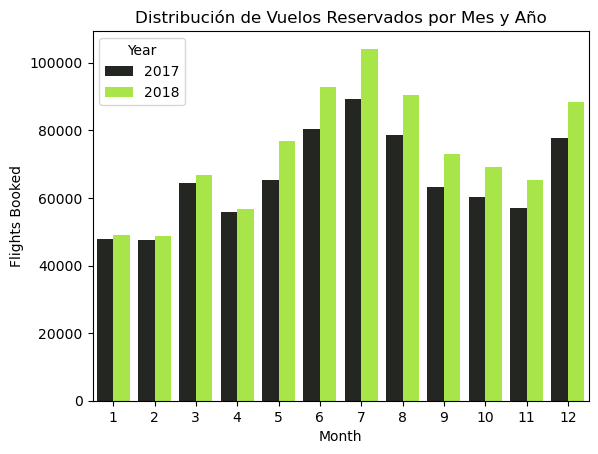

In [168]:
sns.barplot(x = "Month", y = "Flights Booked", data = df_grouped, hue="Year", color= "greenyellow")
plt.xlabel('Month')
plt.ylabel('Flights Booked')
plt.title('Distribución de Vuelos Reservados por Mes y Año');


 <small>En la gráfica se observa:  
##### 📈La reserva de vuelos es superior en periodos vacacionales( periodo estival, Navidad,spring break(marzo) vacaciones de primavera ...)
##### 📈El 2018 fué mas productivo en cuanto a reservas de vuelos que el 2017 en todos los meses.<small>






#### 2.¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

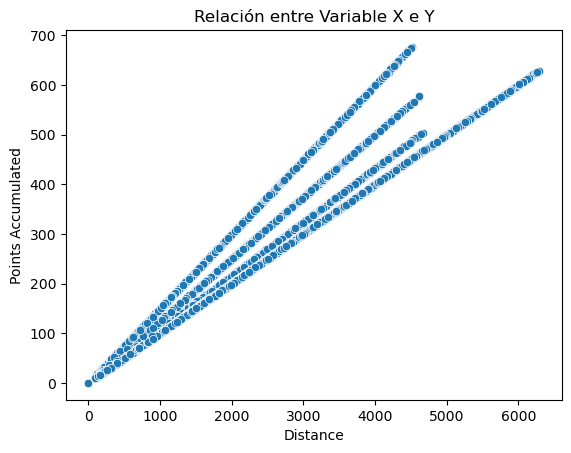

In [ ]:
sns.scatterplot(x='Distance', y='Points Accumulated', data=df_union)
plt.title("Relación entre la distancia y los puntos acumulados")
plt.show()

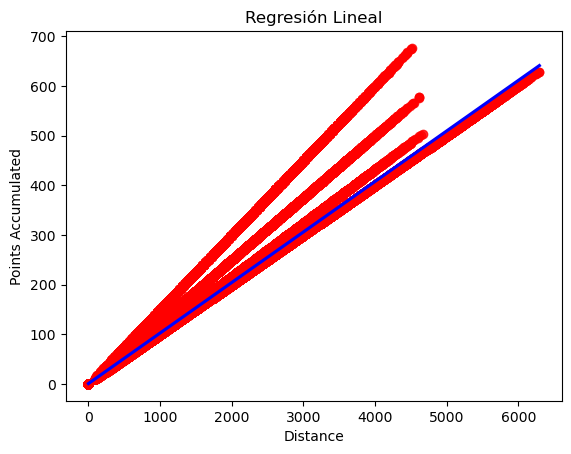

In [ ]:
sns.regplot(x='Distance', y='Points Accumulated', data=df_union, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.title("Regresión Lineal")
plt.show()

 <small>📈La distribución de los puntos siguen un patrón,siguen una línea diagonal ascendente.
 ##### 📈es probable que haya una relación lineal(el cambio de una de ellas puede predecirse en función de la otra) entre la variables.
 ##### 📈La línea de regresión de la gráfica( en color azul) indica que las variables tienen una relación positiva, a medida que una variable aumenta, la otra también. Cuanto mayor es la distancia mayor son los puntos acumulados. <small>

#### 3.¿Cuál es la distribución de los clientes por provincia o estado?

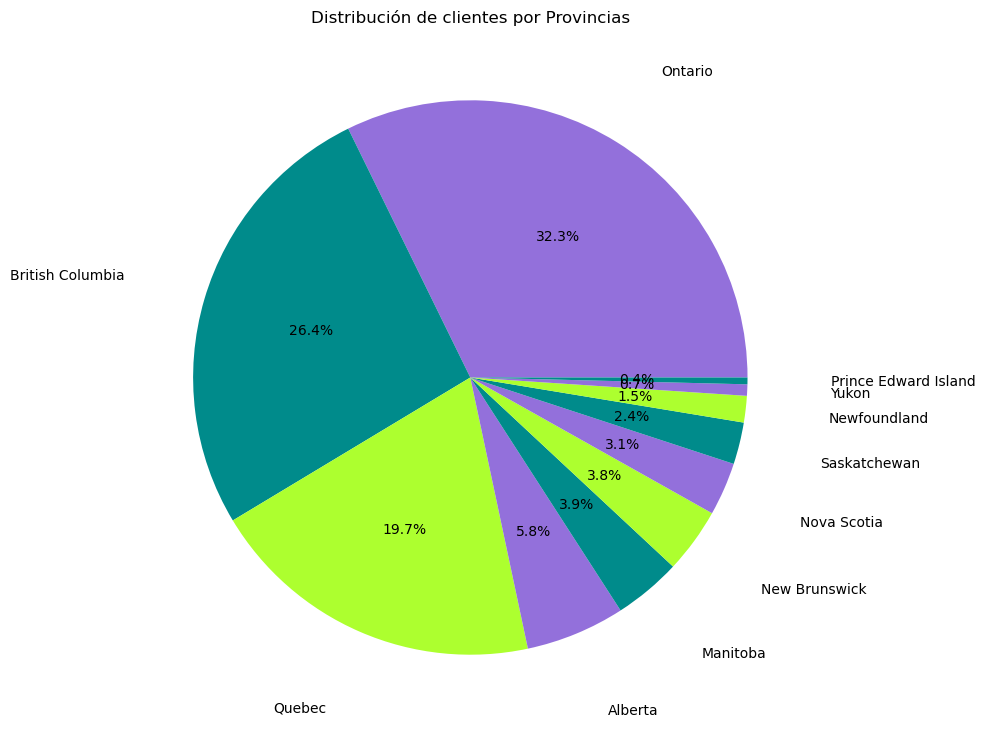

In [188]:

df_union['Province'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    colors=['mediumpurple', 'darkcyan', 'greenyellow'], 
    figsize=(9, 9),  # Ajustar el tamaño del gráfico
    labeldistance=1.3 # Separar las etiquetas de las porciones
)

# Título y etiquetas
plt.title("Distribución de clientes por Provincias")
plt.ylabel("") ; # Eliminar etiqueta 'y'



C:\Users\USER\AppData\Local\Temp\ipykernel_12360\3406724448.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Province', data=df_union, palette='viridis')


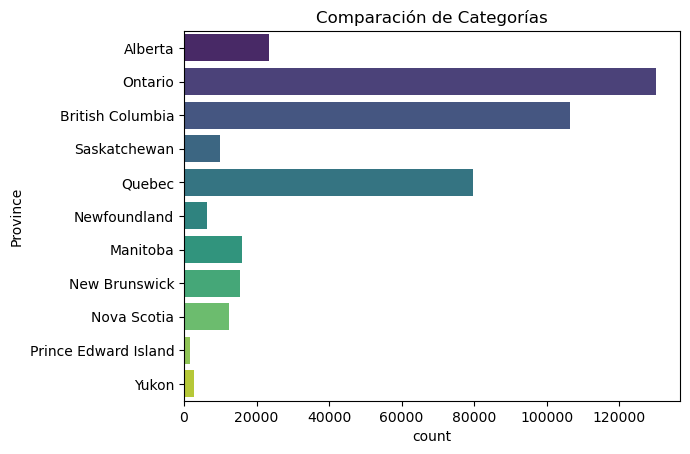

In [189]:
sns.countplot(y='Province', data=df_union, palette='viridis')
plt.title("Comparación de Categorías");



 <small>📉Las 3 provincias o estados con mas clientes serían Ontario con un 32,3%, British Columbia con 26,4% y Quebec con un 19,7% . 
 ##### 📉Las 3 que menos clientes tienen serían Prince Edward Island con 0,4%, Yukon con un 0,7% y NewFoundland con 1,5%. <small>

 #### 4.¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [207]:
salario_promedio_educacion = df_union.groupby('Education')['Salary'].mean().reset_index()

C:\Users\USER\AppData\Local\Temp\ipykernel_12360\3930616800.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Education', y='Salary', data=salario_promedio_educacion, palette='viridis')


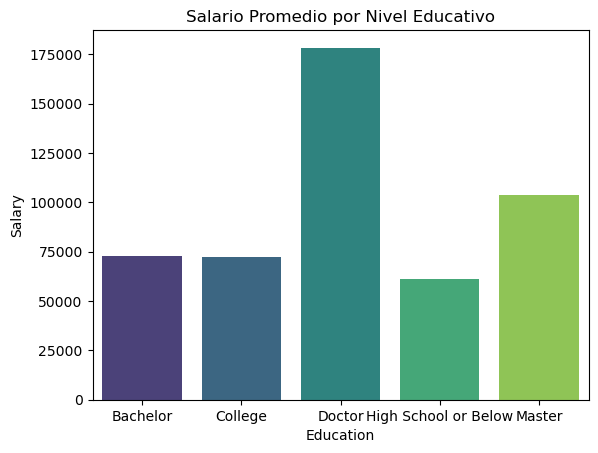

In [213]:

sns.barplot(x='Education', y='Salary', data=salario_promedio_educacion, palette='viridis')

plt.title("Salario Promedio por Nivel Educativo")
plt.xlabel("Education")
plt.ylabel("Salary");



<small>📈Los niveles educativos en Canadá van en este orden de menor a mayor: High School or Below,College,Bachelor,Doctor y Master.Según la gráfica, el salario promedio sigue la misma progresión.Siempre teniendo en cuenta que los datos de la columna "College" no son reales ya que partíamos de nulos para ese nivel.<small>